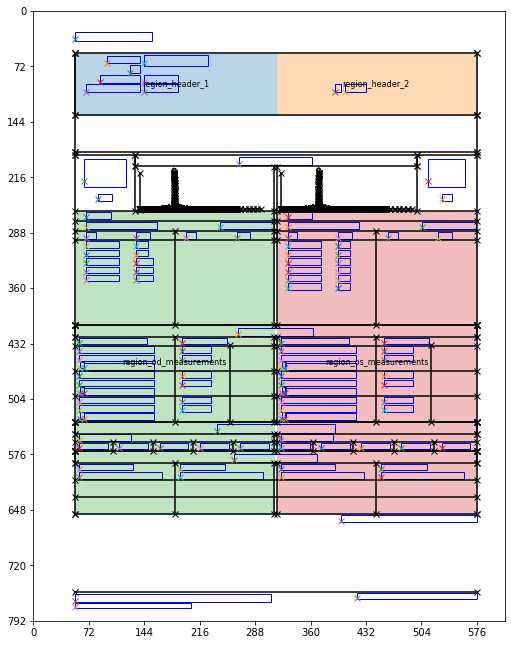

In [ ]:
# Use pymupdf
# Read IOL_PDFs
# Get all the table borders and plot them on a matplotlib figure

import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

with fitz.open("IOL_PDFS/SAMPLE.pdf") as doc:
    paths = []
    for page in doc:
        # Extract all the drawings from the page
        paths = page.get_drawings()
        text_objects = page.get_text("dict")
        
fig, ax = plt.subplots(figsize=(8.5, 11), dpi=72)

MIDLINE_X = (54.0 + 576.0) / 2 # 0.5 * (313.1999816894531 + 316.0799865722656)
QUARTER_X = 54.0 + (313.1999816894531 - 54.0) / 2
regions = {
                "region_header_1": (54.0, 54.0, MIDLINE_X, 135.1199951171875),
                "region_header_2": (MIDLINE_X, 54.0, 576.0, 135.1199951171875),

                "region_od_measurements": (54.0, 259.44000244140625, 313.1999816894531, 653.8800048828125),
                "region_os_measurements": (316.0799865722656, 259.44000244140625, 576.0, 653.8800048828125),
                
                # "region_od_header": (54.0, 193.79998779296875, 313.1999816894531, 310.6800231933594),
                # "region_od_lens_1": (54.0, 310.6800231933594, QUARTER_X, 458.6400146484375),
                # "region_od_lens_2": (QUARTER_X, 310.6800231933594, 313.1999816894531, 458.6400146484375),
                # "region_od_lens_3": (54.0, 458.6400146484375, QUARTER_X, 606.5999755859375),
                # "region_od_lens_4": (QUARTER_X, 458.6400146484375, 313.1999816894531, 606.5999755859375),
            }
# for od_name, os_name in [
#     ("region_od_header", "region_os_header"),
#     ("region_od_lens_1", "region_os_lens_1"),
#     ("region_od_lens_2", "region_os_lens_2"),
#     ("region_od_lens_3", "region_os_lens_3"),
#     ("region_od_lens_4", "region_os_lens_4"),
#     ]:
#     regions[os_name] = (
#         regions[od_name][0] + (316.0799865722656 - 54.0),
#         regions[od_name][1],
#         regions[od_name][2] + (316.0799865722656 - 54.0),
#         regions[od_name][3],
#     )
# print(repr(regions))

for region_name, (x0, y0, x1, y1) in regions.items():
    # Use a color cycle for facecolor
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    facecolor = color_cycle[list(regions.keys()).index(region_name) % len(color_cycle)]
    rect = patches.Rectangle(
        (x0, y0),
        x1 - x0,
        y1 - y0,
        edgecolor="cyan",
        facecolor=facecolor,
        alpha=0.3,
    )
    ax.add_patch(rect)
    ax.text(
        (x0 + x1) / 2,
        (y0 + y1) / 2,
        region_name,
        color="black",
        fontsize=8,
        ha="center",
        va="center",
    )

to_find = (317, 259.44000244140625)
# to_find = (316.6, 194.08)
# ('l', Point(316.0799865722656, 194.1600341796875), Point(316.0799865722656, 311.8800048828125))
# to_find = (54, 194.08)
# ('l', Point(54.0, 193.79998779296875), Point(576.0, 193.79998779296875))
# ('l', Point(54.0, 311.8800048828125), Point(54.0, 193.79998779296875))

for i, path in enumerate(paths):
    for item in path["items"]:
        assert item[0] in ("l", "re", "c"), f"Unexpected item type: {item[0]}"
        
        if item[0] == "l":
            # if (abs(item[1][0] - to_find[0]) < 2 and abs(item[1][1] - to_find[1]) < 2) or (abs(item[2][0] - to_find[0]) < 2 and abs(item[2][1] - to_find[1]) < 2):
                # print(item)
            ax.plot(
                [item[1][0], item[2][0]],
                [item[1][1], item[2][1]],
                color=path["color"],
                marker="x"
            )
        elif item[0] == "re":
            continue
            rect = patches.Rectangle(
                (item[1][0], item[1][1]),
                item[1][2] - item[1][0],
                item[1][3] - item[1][1],
                linewidth=1,
                edgecolor="red",
                facecolor=path["fill"],
            )
            ax.add_patch(rect)
        elif item[0] == "c":
            points = np.array(item[1:])
            ax.plot(
                points[:, 0],
                points[:, 1],
                color=path["color"]
            )
        
for i, obj in enumerate(text_objects["blocks"]):
    # Draw the bbox  
    # ax.add_patch(
    #     patches.Rectangle(
    #         (obj["bbox"][0], obj["bbox"][1]),
    #         obj["bbox"][2] - obj["bbox"][0],
    #         obj["bbox"][3] - obj["bbox"][1],
    #         linewidth=1,
    #         edgecolor="green",
    #         facecolor="none",
    #     )
    # )
    if obj["type"] == 0:
        for line in obj["lines"]:
            for i, span in enumerate(line["spans"]):
                ax.plot(
                    span["origin"][0],
                    span["origin"][1],
                    "x",
                )
                # ax.text(
                #     span["origin"][0],
                #     span["origin"][1],
                #     span["text"],
                #     fontsize=span["size"] * 0.7,
                #     color="black",
                #     ha="left",
                #     va="baseline"
                # )
                # if span["text"] == '∆':
                #     for j in range(i-2, i+2):
                #         print(line["spans"][j])
                # print()
                ax.add_patch(
                    patches.Rectangle(
                        (span["bbox"][0], span["bbox"][1]),
                        span["bbox"][2] - span["bbox"][0],
                        span["bbox"][3] - span["bbox"][1],
                        linewidth=1,
                        edgecolor="blue",
                        facecolor="none",
                    )
                )
                # print(obj["bbox"], span["text"], end=" ")
            # print()

        
# Flip the y-axis to match the PDF coordinate system
ax.set_ylim(11 * 72, 0)
ax.set_xlim(0, 8.5 * 72)
# ax.axvline(MIDLINE_X, color="blue", linestyle=":")
# ax.axhline(META_Y_BOTTOM, color="blue", linestyle=":")
ax.set_xticks(np.arange(0, 8.5 * 72 + 1, 72))
ax.set_yticks(np.arange(0, 11 * 72 + 1, 72))
ax.set_aspect("equal")